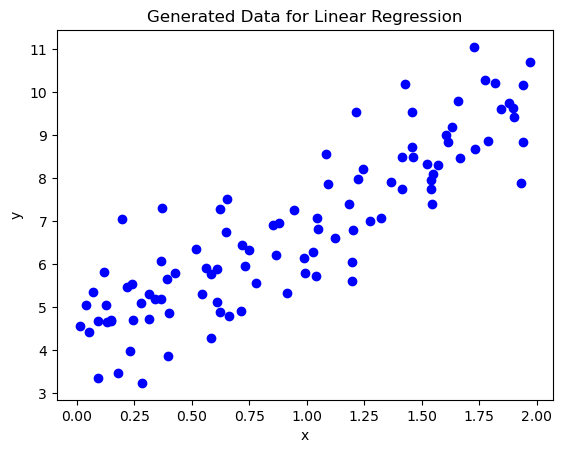

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate 100 random values for X (feature)
X = 2 * np.random.rand(100, 1)  

# Generate corresponding y values using a linear equation with noise
y = 4 + 3 * X + np.random.randn(100, 1)  

# Scatter plot of the dataset
plt.scatter(X, y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Data for Linear Regression")
plt.show()


Theta from Normal Equation (intercept, slope): [4.21509616 2.77011339]
[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[4.21509616]
 [9.75532293]]


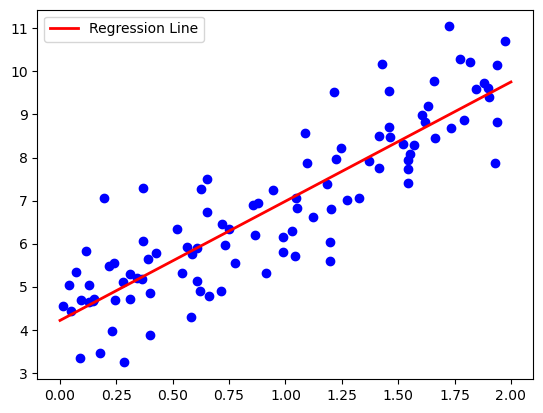

In [30]:
# Add bias term (column of ones for intercept)
X_b = np.c_[np.ones((100, 1)), X]


# Apply Normal Equation: θ = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Theta from Normal Equation (intercept, slope):", theta_best.ravel())

# Predictions for new values
X_new = np.array([[0], [2]]) 
print(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new]
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
print(y_predict)

# Plot regression line
plt.scatter(X, y, color="blue")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Regression Line")
plt.legend()
plt.show()


Theta from Pseudo-Inverse: [4.21509616 2.77011339]


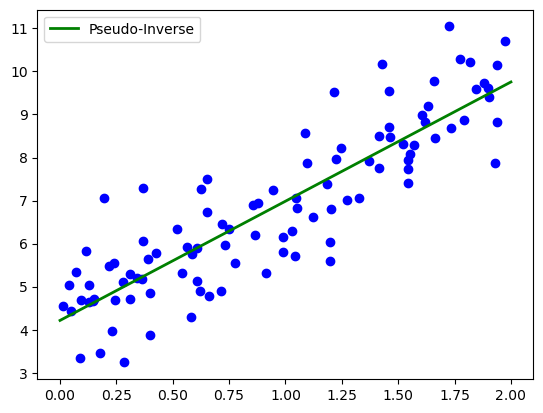

In [11]:
# Using pseudo-inverse (works even when X^T X is not invertible)
theta_pinv = np.linalg.pinv(X_b).dot(y)

print("Theta from Pseudo-Inverse:", theta_pinv.ravel())
# Predictions using Pseudo-Inverse
y_predict_pinv = X_new_b.dot(theta_pinv)

plt.scatter(X, y, color="blue")
plt.plot(X_new, y_predict_pinv, "g-", linewidth=2, label="Pseudo-Inverse")
plt.legend()
plt.show()



Theta from Gradient Descent: [4.21509616 2.77011339]


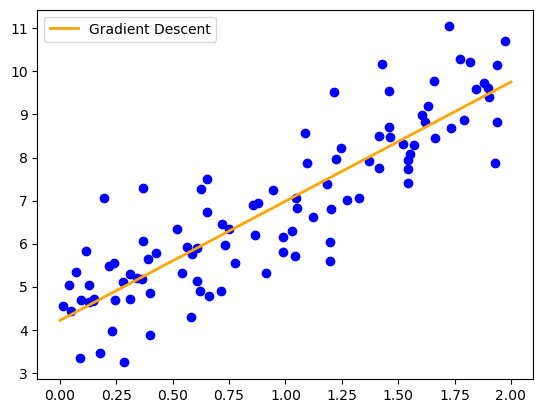

In [13]:
# Parameters
eta = 0.1           # Learning rate
n_iterations = 1000 # Number of updates
m = len(X_b)        # Number of samples

# Random initialization of theta
theta = np.random.randn(2, 1)

# Perform gradient descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # gradient of cost function
    theta = theta - eta * gradients                   # update rule

print("Theta from Gradient Descent:", theta.ravel())
# Predictions using Gradient Descent
y_predict_gd = X_new_b.dot(theta)

plt.scatter(X, y, color="blue")
plt.plot(X_new, y_predict_gd, "orange", linewidth=2, label="Gradient Descent")
plt.legend()
plt.show()


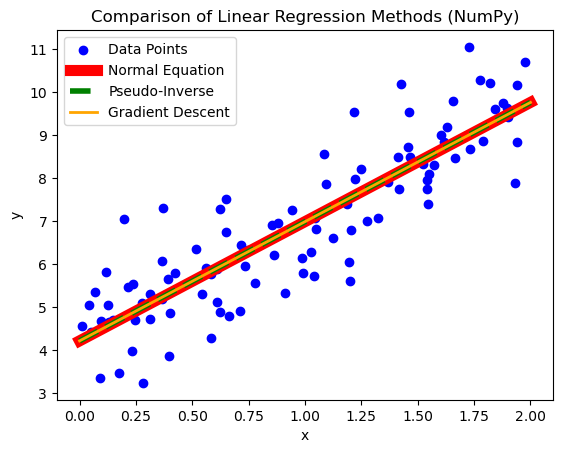

In [18]:
# Predictions for all three methods
y_predict_ne = X_new_b.dot(theta_best)     # Normal Equation
y_predict_pinv = X_new_b.dot(theta_pinv)   # Pseudo-Inverse
y_predict_gd = X_new_b.dot(theta)          # Gradient Descent

# Plot scatter points
plt.scatter(X, y, color="blue", label="Data Points")

# Plot regression lines from all three methods
plt.plot(X_new, y_predict_ne, "r-", linewidth=8, label="Normal Equation")
plt.plot(X_new, y_predict_pinv, "g--", linewidth=4, label="Pseudo-Inverse")
plt.plot(X_new, y_predict_gd, "orange", linewidth=2, label="Gradient Descent")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Linear Regression Methods (NumPy)")
plt.legend()
plt.show()
